# GRADUATE ROTATIONAL INTERNSHIP PROGRAM 

   # The Sparks Foundation

   ## PREDICTION USING SUPERVISED ML

## Problem Statement
### Predict the percentage of marks of an student based on the number of study hours

#### To be find out
What will be predicted score if a student studies for 9.25 hrs/ day?

Step 1. Importing Libraries and reading the csv file

In [120]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
# Importinf libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [121]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [122]:
# To observe the shape of the data frame
df.shape

(25, 2)

In [123]:
# To observe the stastical values of the data frame
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [146]:
# To observe the information regarding data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Step 2. Data Cleaning and EDA

In [125]:
# To find missing values in the data frame
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [126]:
# Outlier detection
fig=px.box(x=df["Scores"])
fig.show()

In [135]:
# visualizing the data
fig=px.scatter(x="Hours",y="Scores",title="Score v/s Hours" ,data_frame=df)
fig.show()

In [147]:
#Visualizing the data
fig=px.bar(x="Hours",y="Scores",title="Score v/s Hours" ,data_frame=df)
fig.show()

Step 3. Performing Linear regression

In [118]:
#Defining X and y for model
X=df["Hours"]
y=df["Scores"]

In [86]:
# test and train data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [87]:
# Checking shape, head of the train and test 
print(df_train.head())
print("*"*10)
print(df_train.shape)
print("*"*10)
print(df_test.head())
print("*"*10)
print(df_test.shape)

    Hours  Scores
6     9.2      88
12    4.5      41
4     3.5      30
24    7.8      86
0     2.5      21
**********
(17, 2)
**********
    Hours  Scores
9     2.7      25
22    3.8      35
13    3.3      42
11    5.9      62
5     1.5      20
**********
(8, 2)


### Using OLS model for predection

BUilding the model

In [148]:
import statsmodels.api as sm

In [89]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [90]:
lr.params

const    1.495142
Hours    9.871714
dtype: float64

In [91]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Tue, 06 Oct 2020   Prob (F-statistic):           1.15e-11
Time:                        15:39:59   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.6

Equation obtained from OLS summary

### Scores=1.4951+(9.871*Hours)
What will be predicted score if a student studies for 9.25 hrs/ day?

Scores=1.4951+(9.871*9.25)

The predicted score is 92.73625

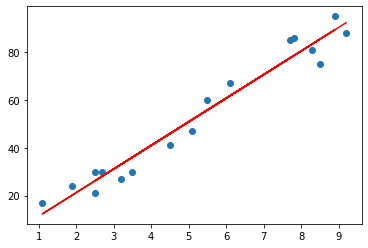

In [149]:
# after predection
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.4951 + 9.871*X_train, 'r')
plt.show()

Step 4: Residual analysis

In [143]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

Step 5: Predictions on the Test Set

In [165]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [97]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [98]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

5.067387845160841

In [99]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9309458862687439

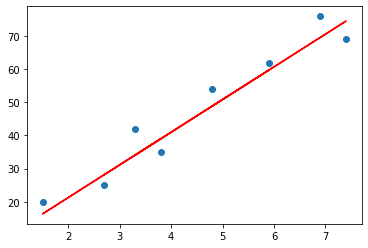

In [100]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 1.4951 + 9.871 * X_test, 'r')
plt.show()

# Linear Regression using linear_model in sklearn

In [101]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [157]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
my_model=lm.fit(X_train_lm, y_train_lm)

In [112]:
print(lm.intercept_)
print(lm.coef_)

1.495142109236383
[9.87171443]


From Linear regression, equation is

### Scores=1.495+(9.87*hours)

## Conclusion, 
What will be predicted score if a student studies for 9.25 hrs/ day?
 
 The Predicted score is  92.73625 